In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from timeit import default_timer as timer
from scipy.integrate import simps
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from gekko import GEKKO
from MSEIR import MSEIR



In [2]:
city_args = {'n_periods': 200, 'N': 100000,
               'R_0': 2.0, 'tLat': 2, 'tInf': 2, 'tHosp': 2,
               'pMild': 0.90, 'pFatal': 0.20, 'pOvf':0.20,
               'Q': 200, 'S0': 100000-1,
               'E0': 0, 'I0': 1, 'H0': 0, 'R0': 0, 'D0': 0}

### Gekko model

In [3]:

tLat = city_args['tLat']
tInf = city_args['tInf']
tHosp = city_args['tHosp']

pMild = city_args['pMild']
pFatal= city_args['pFatal']

R0 = city_args['R_0']
N = city_args['N']

beta = R0/tInf

# fraction of infected and recovered individuals
e_initial = city_args['E0']
i_initial = city_args['I0']
h_initial = city_args['H0']
r_initial = city_args['R0']
d_initial = city_args['D0']
s_initial = city_args['S0']

m = GEKKO()
u = m.MV(0,lb=0.0,ub=0.8)

s,e,i,h,r,d = m.Array(m.Var,6)

s.value = s_initial
e.value = e_initial
i.value = i_initial
h.value = h_initial
r.value = r_initial
d.value = d_initial

m.Equations([s.dt()== -(1 - u)*beta*s*i/N,\
             e.dt()== (1 - u)*beta*s*i/N - e/tLat,\
             i.dt()== e/tLat - i/tInf,\
             h.dt()==(1-pMild)*i/tInf - h/tHosp,\
             r.dt()== pMild*i/tInf + (1-pFatal)*h/tHosp,\
             d.dt()== pFatal*h/tHosp])

t = np.linspace(0, city_args['n_periods'], int(city_args['n_periods']/2+1))
#t = np.insert(t,1,[0.001,0.002,0.004,0.008,0.02,0.04,0.08, 0.2,0.4,0.8])

m.time = t

# initialize with simulation
m.options.IMODE=7
m.options.NODES=3
m.solve(disp=True)


apm 23.249.172.52_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            7
   Intermediates:            0
   Connections  :            0
   Equations    :            6
   Residuals    :            6
 
 Number of state variables:             25
 Number of total equations: -           25
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Sequential Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contain

   1  0.0000000e+00 1.43e-01 5.88e+04   8.9 1.03e+01    -  9.90e-01 9.90e-01h  1
   2  0.0000000e+00 1.42e-03 1.04e+07   6.8 1.14e-01    -  9.90e-01 9.90e-01h  1
   3  0.0000000e+00 3.63e-10 5.48e+07   4.8 1.13e-03    -  9.99e-01 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   0.0000000000000000e+00    0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   3.6278935411360180e-10    3.6278935411360180e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.6278935411360180e-10    3.6278935411360180e-10


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 3.51e+03 0.00e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00   0
Reallocating memory for MA57: lfact (729)
   1  0.0000000e+00 4.23e+01 5.88e+04   8.9 2.62e+03    -  9.90e-01 9.90e-01h  1
   2  0.0000000e+00 4.18e-01 1.04e+07   6.8 3.12e+01    -  9.90e-01 9.90e-01h  1
   3  0.0000000e+00 8.51e-08 8.10e+08   4.8 3.09e-01    -  9.90e-01 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   0.0000000000000000e+00    0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   4.3813877355571205e-09    8.5058331933396403e-08
Complementarity.........:   

   1  0.0000000e+00 5.13e+01 5.88e+04   8.9 4.61e+03    -  9.90e-01 9.90e-01h  1
   2  0.0000000e+00 5.06e-01 1.04e+07   6.8 4.67e+01    -  9.90e-01 9.90e-01h  1
   3  0.0000000e+00 2.25e-07 8.10e+08   4.8 4.62e-01    -  9.90e-01 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   0.0000000000000000e+00    0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   4.3696413557062569e-09    2.2539444444191759e-07
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.3696413557062569e-09    2.2539444444191759e-07


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  0.0000000e+00 7.74e-03 1.04e+07   6.8 6.52e-01    -  9.90e-01 9.90e-01h  1
   3  0.0000000e+00 3.39e-10 6.27e+08   4.8 6.44e-03    -  9.92e-01 1.00e+00h  1

Number of Iterations....: 3

                                   (scaled)                 (unscaled)
Objective...............:   0.0000000000000000e+00    0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   3.3885605432715238e-10    3.3885605432715238e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.3885605432715238e-10    3.3885605432715238e-10


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 4
Number of inequality constraint Jacobian evaluations = 0
Number o

Overall NLP error.......:   1.4551915228366852e-11    1.4551915228366852e-11


Number of objective function evaluations             = 4
Number of objective gradient evaluations             = 4
Number of equality constraint evaluations            = 4
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 4
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 3
Total CPU secs in IPOPT (w/o function evaluations)   =      0.002
Total CPU secs in NLP function evaluations           =      0.000

EXIT: Optimal Solution Found.
 
 The solution was found.
 
 The final value of the objective function is   0.000000000000000E+000
 
 ---------------------------------------------------
 Solver         :  IPOPT (v3.12)
 Solution time  :   0.480099999869708      sec
 Objective      :   0.000000000000000E+000
 Successful solution
 ---------------------------------------------------
 
 ****

   2  0.0000000e+00 2.66e-07 1.05e+07   6.8 4.83e-04    -  9.99e-01 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   0.0000000000000000e+00    0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   2.6596535462886095e-07    2.6596535462886095e-07
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.6596535462886095e-07    2.6596535462886095e-07


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.38e-02 0.00e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00   0
Reallocating memory for MA57: lfact (729)
   1  0.0000000e+00 1.38e-04 5.88e+04   8.9 1.15e-02    -  9.90e-01 9.90e-01h  1
   2  0.0000000e+00 1.73e-09 1.05e+07   6.8 1.14e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   0.0000000000000000e+00    0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   1.7316779121756554e-09    1.7316779121756554e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.7316779121756554e-09    1.7316779121756554e-09


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint ev

Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.4234713045640503e-12    1.4234713045640503e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o function evaluations)   =      0.002
Total CPU secs in NLP function evaluations           =      0.000

EXIT: Optimal Solution Found.
 
 The solution was found.
 
 The final value of the objective function is   0.000000000000000E+000
 
 ---------------------------------------------------
 Solver         :  IPOPT (v3.12)
 Solution time  :   0.684299999964423      sec
 Objective      :   0.000000000000000E+000
 Suc

Reallocating memory for MA57: lfact (729)
   1  0.0000000e+00 6.40e-05 5.89e+04   8.9 8.00e-03    -  9.92e-01 9.92e-01h  1
   2  0.0000000e+00 3.64e-12 6.58e+06   6.8 6.40e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   0.0000000000000000e+00    0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   2.2737367544323206e-13    3.6379788070917130e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.2737367544323206e-13    3.6379788070917130e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality co

In [4]:
max(h.value)

738.37194014

In [5]:
# optimize
m.options.IMODE=6
m.options.MAX_ITER = 2000
h.UPPER = city_args['Q']
u.STATUS = 1
m.options.SOLVER = 3
m.options.TIME_SHIFT = 1
s.value = s.value.value
e.value = e.value.value
i.value = i.value.value
h.value = h.value.value
r.value = r.value.value
d.value = d.value.value
m.Minimize(u)
m.solve(disp=True)

apm 23.249.172.52_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            7
   Intermediates:            0
   Connections  :            0
   Equations    :            7
   Residuals    :            7
 
 Number of state variables:           3000
 Number of total equations: -         2900
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipop

  71  7.4268369e+01 4.93e-03 5.52e+08   1.6 8.77e-02   1.0 1.00e+00 5.00e-01f  2
  72  7.4267939e+01 7.93e-06 9.19e+00  -0.1 1.28e-02   0.5 1.00e+00 1.00e+00h  1
  73  7.4267910e+01 3.69e-08 2.73e+06  -6.1 1.94e-03   0.1 9.97e-01 1.00e+00h  1
  74  7.4267794e+01 9.10e-07 2.23e-03  -3.6 5.82e-03  -0.4 1.00e+00 1.00e+00h  1
  75  7.4267453e+01 7.89e-06 1.76e+02  -5.4 1.75e-02  -0.9 9.94e-01 1.00e+00h  1
  76  7.4266452e+01 7.14e-05 2.23e-03  -6.8 5.24e-02  -1.4 1.00e+00 1.00e+00h  1
  77  7.4262863e+01 1.12e-03 2.23e-03  -7.6 1.57e-01  -1.8 1.00e+00 1.00e+00h  1
  78  7.4260638e+01 1.87e-04 2.49e-03  -9.1 6.58e-02  -1.4 1.00e+00 1.00e+00h  1
  79  7.4253840e+01 2.88e-03 7.50e-02  -8.2 3.03e-01  -1.9 1.00e+00 8.42e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80  7.4253798e+01 2.86e-03 5.55e+01  -6.2 1.18e-01  -1.5 1.00e+00 7.80e-03h  1
  81  7.4241194e+01 8.55e-03 8.79e-01  -6.7 3.88e-01  -1.9 1.00e+00 9.53e-01h  1
  82  7.4241018e+01 8.54e-03

 167  6.8453189e+01 1.23e+01 9.05e-02  -2.1 1.45e+02  -6.0 1.00e+00 1.00e+00f  1
 168  6.8302467e+01 5.39e+00 5.99e+04  -2.2 5.91e+01  -5.5 1.00e+00 5.71e-01h  1
 169  6.8081793e+01 1.73e+00 6.83e+03  -2.2 1.60e+02  -6.0 1.00e+00 8.86e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 170  6.7862971e+01 1.74e+01 3.79e-02  -2.2 3.55e+02  -6.5 1.00e+00 1.00e+00h  1
 171  6.7739326e+01 2.21e+00 2.36e-03  -2.2 1.31e+02  -6.1 1.00e+00 1.00e+00h  1
 172  6.7025680e+01 8.00e+00 7.35e+02  -2.3 3.03e+02  -6.5 1.00e+00 9.97e-01h  1
 173  6.6211335e+01 2.13e+00 1.32e-02  -2.7 1.17e+02  -6.1 1.00e+00 1.00e+00h  1
 174  6.6828520e+01 2.10e+01 2.13e+04  -2.1 3.56e+02  -6.6 5.75e-01 6.15e-01h  1
 175  6.6621192e+01 3.04e+00 1.51e+04  -2.4 3.97e+01  -5.3 1.00e+00 8.56e-01h  1
 176  6.6496262e+01 9.77e-02 7.35e-03  -2.4 3.82e+01  -5.7 1.00e+00 1.00e+00h  1
 177  6.6470507e+01 7.35e-01 1.63e+01  -2.4 2.93e+02  -6.2 1.59e-01 7.35e-02h  2
 178  6.5797619e+01 9.82e-01

 262  5.8586261e+01 1.52e-01 2.88e+01  -4.6 5.10e+02  -7.9 3.48e-01 1.56e-02h  1
 263  5.8568577e+01 2.40e-01 6.13e-01 -10.4 5.21e+03  -8.4 1.93e-02 1.25e-02h  1
 264  5.8565621e+01 2.40e-01 9.45e+02 -10.4 6.87e+03  -8.9 2.27e-01 8.65e-04h  1
 265  5.8476375e+01 4.60e-01 9.43e+02 -10.4 5.02e+05    -  1.44e-05 3.68e-04f  1
 266  5.8458191e+01 4.62e-01 1.00e+03  -6.3 1.92e+03  -8.5 4.79e-02 2.25e-02h  1
 267  5.7850916e+01 2.27e+01 6.68e+03  -3.3 9.70e+03  -8.9 4.65e-02 1.59e-01f  1
 268  5.7813883e+01 1.95e+01 8.96e+03  -4.8 2.65e+02  -7.6 9.34e-01 1.40e-01h  1
 269  5.7770203e+01 1.81e+01 8.39e+03  -4.8 8.01e+02  -8.1 7.23e-01 7.34e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270  5.7764150e+01 1.76e+01 8.41e+03 -10.2 2.34e+02  -7.7 1.65e-01 2.42e-02h  1
 271  5.7767699e+01 1.69e+01 5.04e+03  -2.9 3.89e+03  -8.1 6.51e-02 3.92e-02f  1
 272  5.7745274e+01 1.67e+01 4.96e+03  -4.0 2.38e+03  -8.6 2.47e-02 1.48e-02h  1
 273  5.7574329e+01 1.61e+01

 359  5.0329396e+01 1.86e-03 1.37e+02  -4.5 7.49e-01  -4.1 1.00e+00 8.84e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360  5.0329052e+01 4.57e-03 1.81e+03  -4.2 3.17e+00  -4.5 1.00e+00 3.79e-01h  1
 361  5.0326027e+01 5.66e-03 6.77e+02  -4.3 6.25e+00  -5.0 1.00e+00 3.14e-01h  1
 362  5.0320355e+01 7.19e-03 2.02e+02  -4.4 1.63e+01  -5.5 1.00e+00 3.15e-01h  1
 363  5.0281211e+01 4.26e-01 2.10e+01  -4.7 4.65e+01  -6.0 1.00e+00 9.92e-01h  1
 364  5.0257916e+01 8.40e-01 7.44e+02  -4.3 1.44e+02  -6.5 7.18e-01 4.34e-01h  1
 365  5.0250740e+01 1.30e+00 2.88e+03  -3.3 6.85e+02  -6.9 1.49e-01 9.57e-02f  1
 366  5.0211594e+01 1.60e+00 2.87e+02  -4.2 1.90e+02  -6.5 1.00e+00 3.89e-01h  1
 367  5.0219530e+01 1.62e+00 2.04e+04  -3.3 2.76e+02  -7.0 5.82e-01 9.04e-02h  1
 368  5.0211334e+01 1.72e+00 1.75e+04  -3.4 4.00e+02  -7.5 2.21e-01 1.60e-01h  1
 369  5.0342004e+01 1.81e+00 3.54e+03  -3.3 9.39e+01  -7.0 1.00e+00 9.07e-01h  1
iter    objective    inf_pr 

 453  3.2462130e+01 3.81e+00 2.98e+03  -5.0 3.77e+01  -6.4 1.00e+00 3.34e-01h  1
 454  3.2486193e+01 2.21e+00 8.57e+03  -3.7 5.28e+01  -6.8 1.00e+00 4.27e-01h  1
 455  3.2469559e+01 1.47e+00 2.97e+03  -3.8 1.12e+02  -7.3 1.00e+00 3.34e-01h  1
 456  3.2425082e+01 1.17e+00 1.84e+03  -9.9 2.64e+02  -7.8 2.37e-01 2.01e-01h  1
 457  3.2216787e+01 7.63e-01 7.85e+03  -3.6 9.78e+02  -8.3 1.00e+00 4.56e-01h  1
 458  3.2006992e+01 1.53e+00 7.23e+03  -9.7 4.56e+03  -8.8 8.78e-02 9.22e-02h  1
 459  3.1336079e+01 2.85e+01 1.19e+04  -2.4 1.59e+04  -9.2 7.98e-02 1.33e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 460  3.1012136e+01 1.14e+01 1.45e+04  -3.6 4.24e+02  -7.9 1.00e+00 5.91e-01h  1
 461  3.0733605e+01 8.85e+00 7.29e+03  -9.5 1.46e+03  -8.4 7.15e-02 2.24e-01h  1
 462  3.0652361e+01 2.14e+00 4.28e+03  -3.9 2.57e+01  -6.1 1.00e+00 7.58e-01h  1
 463  3.0582426e+01 1.22e-02 4.46e-04  -4.4 8.43e+00  -5.7 1.00e+00 1.00e+00h  1
 464  3.0552785e+01 4.71e-02

 547  2.3741759e+01 7.42e+00 4.32e+04  -2.8 9.48e+02  -8.3 1.00e+00 5.28e-01h  1
 548  2.2870860e+01 7.74e+00 3.97e+04  -2.8 2.74e+04    -  2.77e-02 8.22e-02h  1
 549  2.2838788e+01 1.37e+01 3.63e+04  -2.4 3.56e+03  -8.8 2.47e-01 2.75e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550  2.2606886e+01 1.07e+01 6.27e+04  -2.7 9.90e+02  -8.3 1.00e+00 2.34e-01h  1
 551  2.1966058e+01 6.67e+00 3.21e+04  -2.9 2.63e+03  -8.8 2.12e-01 3.41e-01h  1
 552  2.1147840e+01 2.57e+01 2.10e-02  -2.8 1.16e+03  -8.4 1.00e+00 1.00e+00h  1
 553  2.1635003e+01 6.50e+01 1.14e+05  -2.1 4.89e+03  -8.9 8.41e-02 2.52e-01f  1
 554  2.1470416e+01 5.79e+01 1.00e+05  -2.7 2.43e+03  -8.4 2.02e-01 1.09e-01h  1
 555  2.0614667e+01 4.67e+01 6.91e+03  -2.7 9.23e+02  -8.0 2.75e-01 1.00e+00h  1
 556  2.0486400e+01 4.76e+01 1.48e+04  -8.7 6.67e+03  -8.5 7.60e-02 3.61e-02h  1
 557  1.9817134e+01 9.93e+00 2.49e+04  -3.5 1.63e+02  -7.2 9.25e-01 7.89e-01h  1
 558  1.9699106e+01 5.83e+00

 643  1.2693866e+01 3.24e+01 1.25e+05  -2.2 2.42e+03    -  5.77e-02 2.74e-01h  1
 644  1.2652542e+01 3.11e+01 1.57e+05  -8.8 2.32e+02  -7.4 4.44e-01 3.97e-02h  1
 645  1.2277848e+01 2.07e+01 9.00e+04  -3.2 8.84e+02  -7.8 4.83e-01 4.22e-01h  1
 646  1.1814428e+01 2.00e+00 3.35e+02  -3.2 1.97e+02  -7.4 9.50e-01 1.00e+00h  1
 647  1.1891535e+01 1.05e+01 4.28e+03  -2.9 1.00e+03  -7.9 4.37e-01 3.50e-01h  1
 648  1.1776142e+01 2.84e+00 1.18e+03  -3.2 1.80e+02  -7.5 1.00e+00 9.12e-01h  1
 649  1.1754267e+01 3.37e+00 4.15e+02  -3.2 4.71e+02  -7.9 9.03e-01 2.99e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 650  1.1710851e+01 3.21e-01 4.39e+00  -3.2 1.04e+02  -7.5 1.00e+00 9.99e-01h  1
 651  1.1585977e+01 1.35e+00 3.20e+03  -3.4 2.49e+02  -8.0 9.99e-01 8.31e-01h  1
 652  1.1342007e+01 5.12e-01 2.73e+03  -4.2 1.22e+02  -7.6 9.18e-01 9.89e-01h  1
 653  1.1414390e+01 2.79e+01 1.09e+04  -3.6 6.35e+02  -8.0 2.69e-01 9.57e-01h  1
 654  1.1401848e+01 2.43e+01

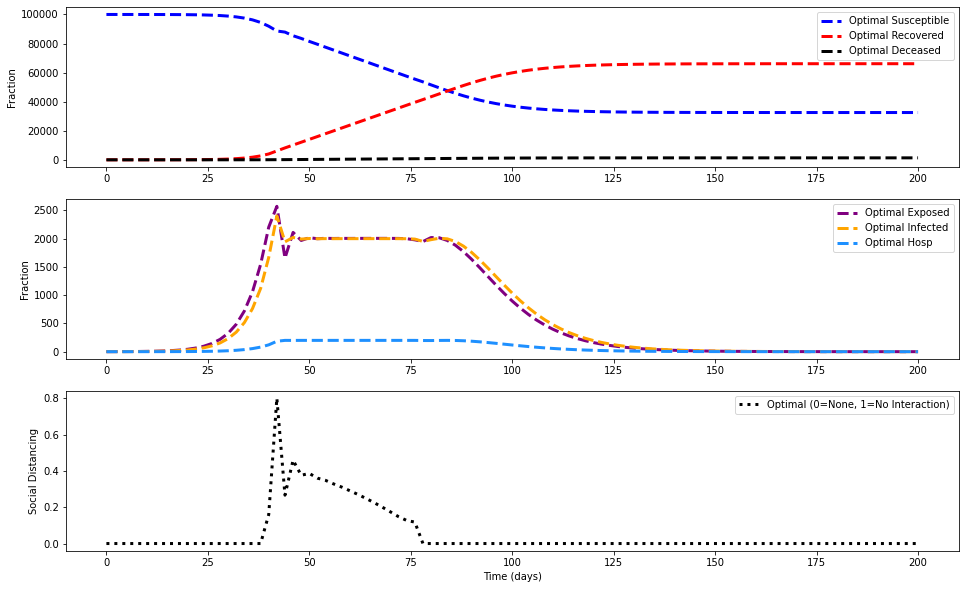

In [6]:
# plot the optimized response
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(m.time, s.value, color='blue', lw=3, ls='--', label='Optimal Susceptible')
plt.plot(m.time, r.value, color='red',  lw=3, ls='--', label='Optimal Recovered')
plt.plot(m.time, d.value, color='black',  lw=3, ls='--', label='Optimal Deceased')
plt.ylabel('Fraction')
plt.legend()

plt.subplot(3,1,2)
plt.plot(m.time, e.value, color='purple', ls='--', lw=3, label='Optimal Exposed')
plt.plot(m.time, i.value, color='orange', ls='--', lw=3, label='Optimal Infected')
plt.plot(m.time, h.value, color='dodgerblue', ls='--', lw=3, label='Optimal Hosp')
plt.ylabel('Fraction')
plt.legend()

plt.subplot(3,1,3)
plt.plot(m.time, u.value, 'k:', lw=3, label='Optimal (0=None, 1=No Interaction)')
plt.ylabel('Social Distancing')
plt.legend()

plt.xlabel('Time (days)')

plt.show()

### MSEIR model

In [13]:
start = timer()

model = MSEIR(**city_args)
mseirRES = model.solve(U=0, optimize=True, solver='SLSQP', freq=1, hor=2.5, bounds=(0,0.8))[::20]
fig0 = model.plot(mseirRES, comps='HD', title='Model comparison: MSEIR vs Gekko+IPOPT')

print(timer() - start)

1.1814606380000043


### Comparison

In [14]:

res_np = np.asarray([s,e,i,h,r,d,t,u,np.zeros(len(t)),np.zeros(len(t)),city_args['Q'] * np.ones(len(t))]).T
df_names = ['S', 'E', 'I', 'H', 'R', 'D', 't', 'Uf', 'mInf', 'rInf', 'Q']
gekkoRES = pd.DataFrame(res_np, columns=df_names)
fig1 = model.plot(gekkoRES, comps='HD')


In [9]:
simps(mseirRES['Uf']) - simps(gekkoRES['Uf'])

-0.14503963662998487

In [16]:

fig1['data'][0]['line']['color']='dodgerblue'
fig1['data'][2]['line']['color']='dodgerblue'
fig1['data'][1]['line']['color']='dodgerblue'

fig0.add_trace(fig1['data'][0])
fig0.add_trace(fig1['data'][2])
fig0.add_trace(fig1['data'][1])


### Summary

In [11]:

xT = pd.date_range(start = '2020-01-01',
                   end = datetime.strptime('2020-01-01', "%Y-%m-%d")+timedelta(days=200),
                   periods=730)

maxI1 = (mseirRES['D'].max() + mseirRES['R'].max())
maxI2 = (gekkoRES['D'].max() + gekkoRES['R'].max())

maxD1 = mseirRES['D'].max().round(0)
maxD2 = gekkoRES['D'].max().round(0)

perD1 = mseirRES['D'].max() / (mseirRES['D'].max() + mseirRES['R'].max())
perD2 = gekkoRES['D'].max() / (gekkoRES['D'].max() + gekkoRES['R'].max())

perI1 = maxI1/mseirRES['S'].max()
perI2 = maxI2/gekkoRES['S'].max()

idx = mseirRES['Uf'].to_numpy().nonzero()[0]
i = mseirRES['H'] - mseirRES['Q']
min_U1 = xT[idx[-1] if idx.size > 0 else 0]
min_Ul1 = idx.size
area_U1 = round(simps(mseirRES['Uf']),2)
cost_U1 = round(simps((i+abs(i))/2) + simps(mseirRES['Uf']),2)

idx = gekkoRES['Uf'].to_numpy().nonzero()[0]
i = gekkoRES['H'] - gekkoRES['Q']
min_U2 = xT[idx[-1] if idx.size > 0 else 0].date()
min_Ul2 = idx.size
area_U2 = round(simps(gekkoRES['Uf']),2)
cost_U2 = round(simps((i+abs(i))/2) + simps(gekkoRES['Uf']),2)

total__ = [[area_U1, min_U1, min_Ul1, maxI1, perI1, maxD1, perD1, cost_U1],
           [area_U2, min_U2, min_Ul2, maxI2, perI2, maxD2, perD2, cost_U2]]

cols = ['Control strength', 'Control release date', 'Control duration',
        'Total Infected', 'Total Infected (% population)', 'Total Deceased',
       'Total Deceased (% infected)', 'Final value of cost function']

table_summary = pd.DataFrame(total__, columns=cols)
table_summary.index = ['Scenario 1', 'Scenario 2']
table_summary.T



,Scenario 1,Scenario 2
Control strength,5.65,5.79
Control release date,2020-01-11 23:22:28.148148148,2020-01-11 00:00:00
Control duration,20,20
Total Infected,67447.6,67466.9
Total Infected (% population),0.674482,0.674676
Total Deceased,1349,1349
Total Deceased (% infected),0.02,0.02
Final value of cost function,5.73,5.79
